In [95]:
import topology as tg
import importlib
import uuid
importlib.reload(tg)
node_list = [
tg.Node(str(uuid.uuid4()), "host", 1000, int(1e9), 0, 0),
tg.Node(str(uuid.uuid4()), "host", 1000, int(1e9), 0, 0),
tg.Node(str(uuid.uuid4()), "host", 1000, int(1e9), 0, 0),
tg.Node(str(uuid.uuid4()), "host", 1000, int(1e9), 0, 0),
tg.Node(str(uuid.uuid4()), "host", 1000, int(1e9), 0, 0),
tg.Node(str(uuid.uuid4()), "host", 1000, int(1e9), 0, 0)
]
t = tg.Topology()
for n in node_list:
    t.add_node(n)
t.connect(node_list[0], node_list[1], uuid.uuid4(), int(1e7), 10)
t.connect(node_list[1], node_list[2], uuid.uuid4(), int(1e7), 2)
t.connect(node_list[1], node_list[3], uuid.uuid4(), int(1e7), 2)
t.connect(node_list[1], node_list[4], uuid.uuid4(), int(1e7), 2)
t.connect(node_list[4], node_list[5], uuid.uuid4(), int(1e7), 1)

In [96]:
import vivaldi.compute as vivaldi_compute
import vivaldi.coordinate as vivaldi_coordinate
importlib.reload(vivaldi_compute)
importlib.reload(vivaldi_coordinate)
lat_matrix = vivaldi_compute.get_latency_matrix(t)
print(lat_matrix)
coordinate_2d_class = vivaldi_coordinate.create_coordinate_class(2)
matrix_error = vivaldi_compute.matrix_error(lat_matrix, {n.uuid: coordinate_2d_class(0,0) for n in node_list})
print(matrix_error)

{'c93b619f-d1ba-460c-8e6e-33f79a047a39': {'c93b619f-d1ba-460c-8e6e-33f79a047a39': 0, '49b91655-a881-4446-b686-5214ec7c20d1': 10, 'f967689b-d74d-44ac-ad48-6cfec6be3efa': 12, '1b221369-ba6a-4cbe-bc13-7568346b6363': 12, '404c434c-6762-46d2-adf3-d49a5eaf65b9': 12, 'd10ba703-c71b-477a-a7d7-036511652be0': 13}, '49b91655-a881-4446-b686-5214ec7c20d1': {'c93b619f-d1ba-460c-8e6e-33f79a047a39': 10, '49b91655-a881-4446-b686-5214ec7c20d1': 0, 'f967689b-d74d-44ac-ad48-6cfec6be3efa': 2, '1b221369-ba6a-4cbe-bc13-7568346b6363': 2, '404c434c-6762-46d2-adf3-d49a5eaf65b9': 2, 'd10ba703-c71b-477a-a7d7-036511652be0': 3}, 'f967689b-d74d-44ac-ad48-6cfec6be3efa': {'c93b619f-d1ba-460c-8e6e-33f79a047a39': 12, '49b91655-a881-4446-b686-5214ec7c20d1': 2, 'f967689b-d74d-44ac-ad48-6cfec6be3efa': 0, '1b221369-ba6a-4cbe-bc13-7568346b6363': 4, '404c434c-6762-46d2-adf3-d49a5eaf65b9': 4, 'd10ba703-c71b-477a-a7d7-036511652be0': 5}, '1b221369-ba6a-4cbe-bc13-7568346b6363': {'c93b619f-d1ba-460c-8e6e-33f79a047a39': 12, '49b916

In [97]:
updated = vivaldi_compute.vivaldi_compute(t, {n.uuid: coordinate_2d_class(0,0) for n in node_list}, 1, 1000)
for k, v in updated.items():
    print(k, v)

2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG initial error: 136.83333333333334
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #0 error: 90.62196459586274
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #100 error: 1.131370345577414
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #200 error: 1.1287319820990167
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #300 error: 1.1287317856547627
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #400 error: 1.1287317856377557
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #500 error: 1.1287317856377548
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #600 error: 1.1287317856377541
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #700 error: 1.1287317856377534
2021-08-01 22:57:15 Vancior-Redmi vivaldi.compute[30708] DEBUG iteration #8

c93b619f-d1ba-460c-8e6e-33f79a047a39 (4.40338845718802,8.805243071474527)
49b91655-a881-4446-b686-5214ec7c20d1 (-0.07519276171689421,-0.9723936516337673)
f967689b-d74d-44ac-ad48-6cfec6be3efa (1.9110918041761757,-1.6433725103906651)
1b221369-ba6a-4cbe-bc13-7568346b6363 (0.28691258929542884,-3.600332794812718)
404c434c-6762-46d2-adf3-d49a5eaf65b9 (-2.27057650933993,-0.9341950805142369)
d10ba703-c71b-477a-a7d7-036511652be0 (-3.3719533278400706,-1.1028352755734767)


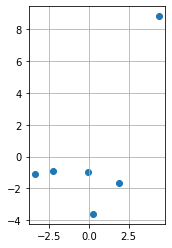

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.scatter(*zip(*updated.values()))
plt.grid(True)
plt.show()

In [99]:
import numpy as np
coords = list(updated.values())
matrix = np.zeros((len(coords), len(coords)))
for i in range(len(coords)):
    for j in range(len(coords)):
        matrix[i][j] = abs(coords[i] - coords[j])
print(matrix)

[[ 0.         10.75452787 10.74174614 13.07071865 11.80671266 12.59467969]
 [10.75452787  0.          2.09655408  2.6527692   2.19571604  3.29934012]
 [10.74174614  2.09655408  0.          2.54315782  4.24137743  5.3106258 ]
 [13.07071865  2.6527692   2.54315782  0.          3.69446083  4.429988  ]
 [11.80671266  2.19571604  4.24137743  3.69446083  0.          1.11421291]
 [12.59467969  3.29934012  5.3106258   4.429988    1.11421291  0.        ]]
